In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

In [2]:
### T G C F R

In [4]:
TTable=pd.read_excel('China2020_2021\Data2022\TTable_1.xlsx')

In [5]:
TTable_T=TTable.T

In [6]:
TTable_T

0      1       2      3        4
2022-03-01   960.2  204.5  3673.1  125.5  34233.1
2021-12-01  1487.2  289.4  4651.3  176.1  41268.9
2021-11-01  1484.1  270.2  3777.0  167.1  41043.2
2021-10-01  1227.2  247.5  3396.8  148.7  40453.9
2021-09-01  1062.9  262.5  3535.4  150.8  36833.0
2021-08-01   899.6  250.2  3280.1  136.5  34394.9
2021-07-01   944.6  203.1  3347.2  137.5  34925.1
2021-06-01  1174.3  240.1  3866.7  160.8  37585.8
2021-05-01  1129.9  262.3  3688.1  133.4  35945.1
2021-04-01  1030.5  222.1  3684.7  126.2  33152.6
2021-03-01  1129.5  259.2  3929.9  135.2  35484.1
2020-12-01  1526.6  289.1  4871.1  194.0  40566.0
2020-11-01  1497.5  257.6  4016.8  167.8  39514.2
2020-10-01  1274.0  222.3  3708.5  157.3  38576.5
2020-09-01  1124.8  222.0  3866.2  157.0  35294.7
2020-08-01   967.2  234.8  3412.8  138.5  33570.6
2020-07-01   889.3  178.8  3308.3  137.1  32202.5
2020-06-01  1059.3  193.4  3612.2  158.7  33525.9
2020-05-01  1017.8  203.1  3376.1  133.6  31972.8
2020-04-01   798.7  154.7  3082.7  115.3  28177.8

In [7]:
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'F',4:'R'})

In [8]:
from sklearn.tree import DecisionTreeRegressor 


In [9]:
array = TTable_T.values

In [13]:
X = array[6:,0:4]
Y = array[6:,4]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [15]:
model = DecisionTreeRegressor(max_leaf_nodes = 20)

In [16]:
rt = model.fit(X_train, Y_train)
rt

DecisionTreeRegressor(max_leaf_nodes=20)

In [17]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeRegressor(max_leaf_nodes=20)

In [21]:
X_new= array[:6,0:4]
Ypre = model.predict(X_new)
Prediction=pd.DataFrame(Ypre)

In [22]:
Prediction

0
0  33152.6
1  39514.2
2  39514.2
3  33525.9
4  33525.9
5  32202.5

In [24]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys


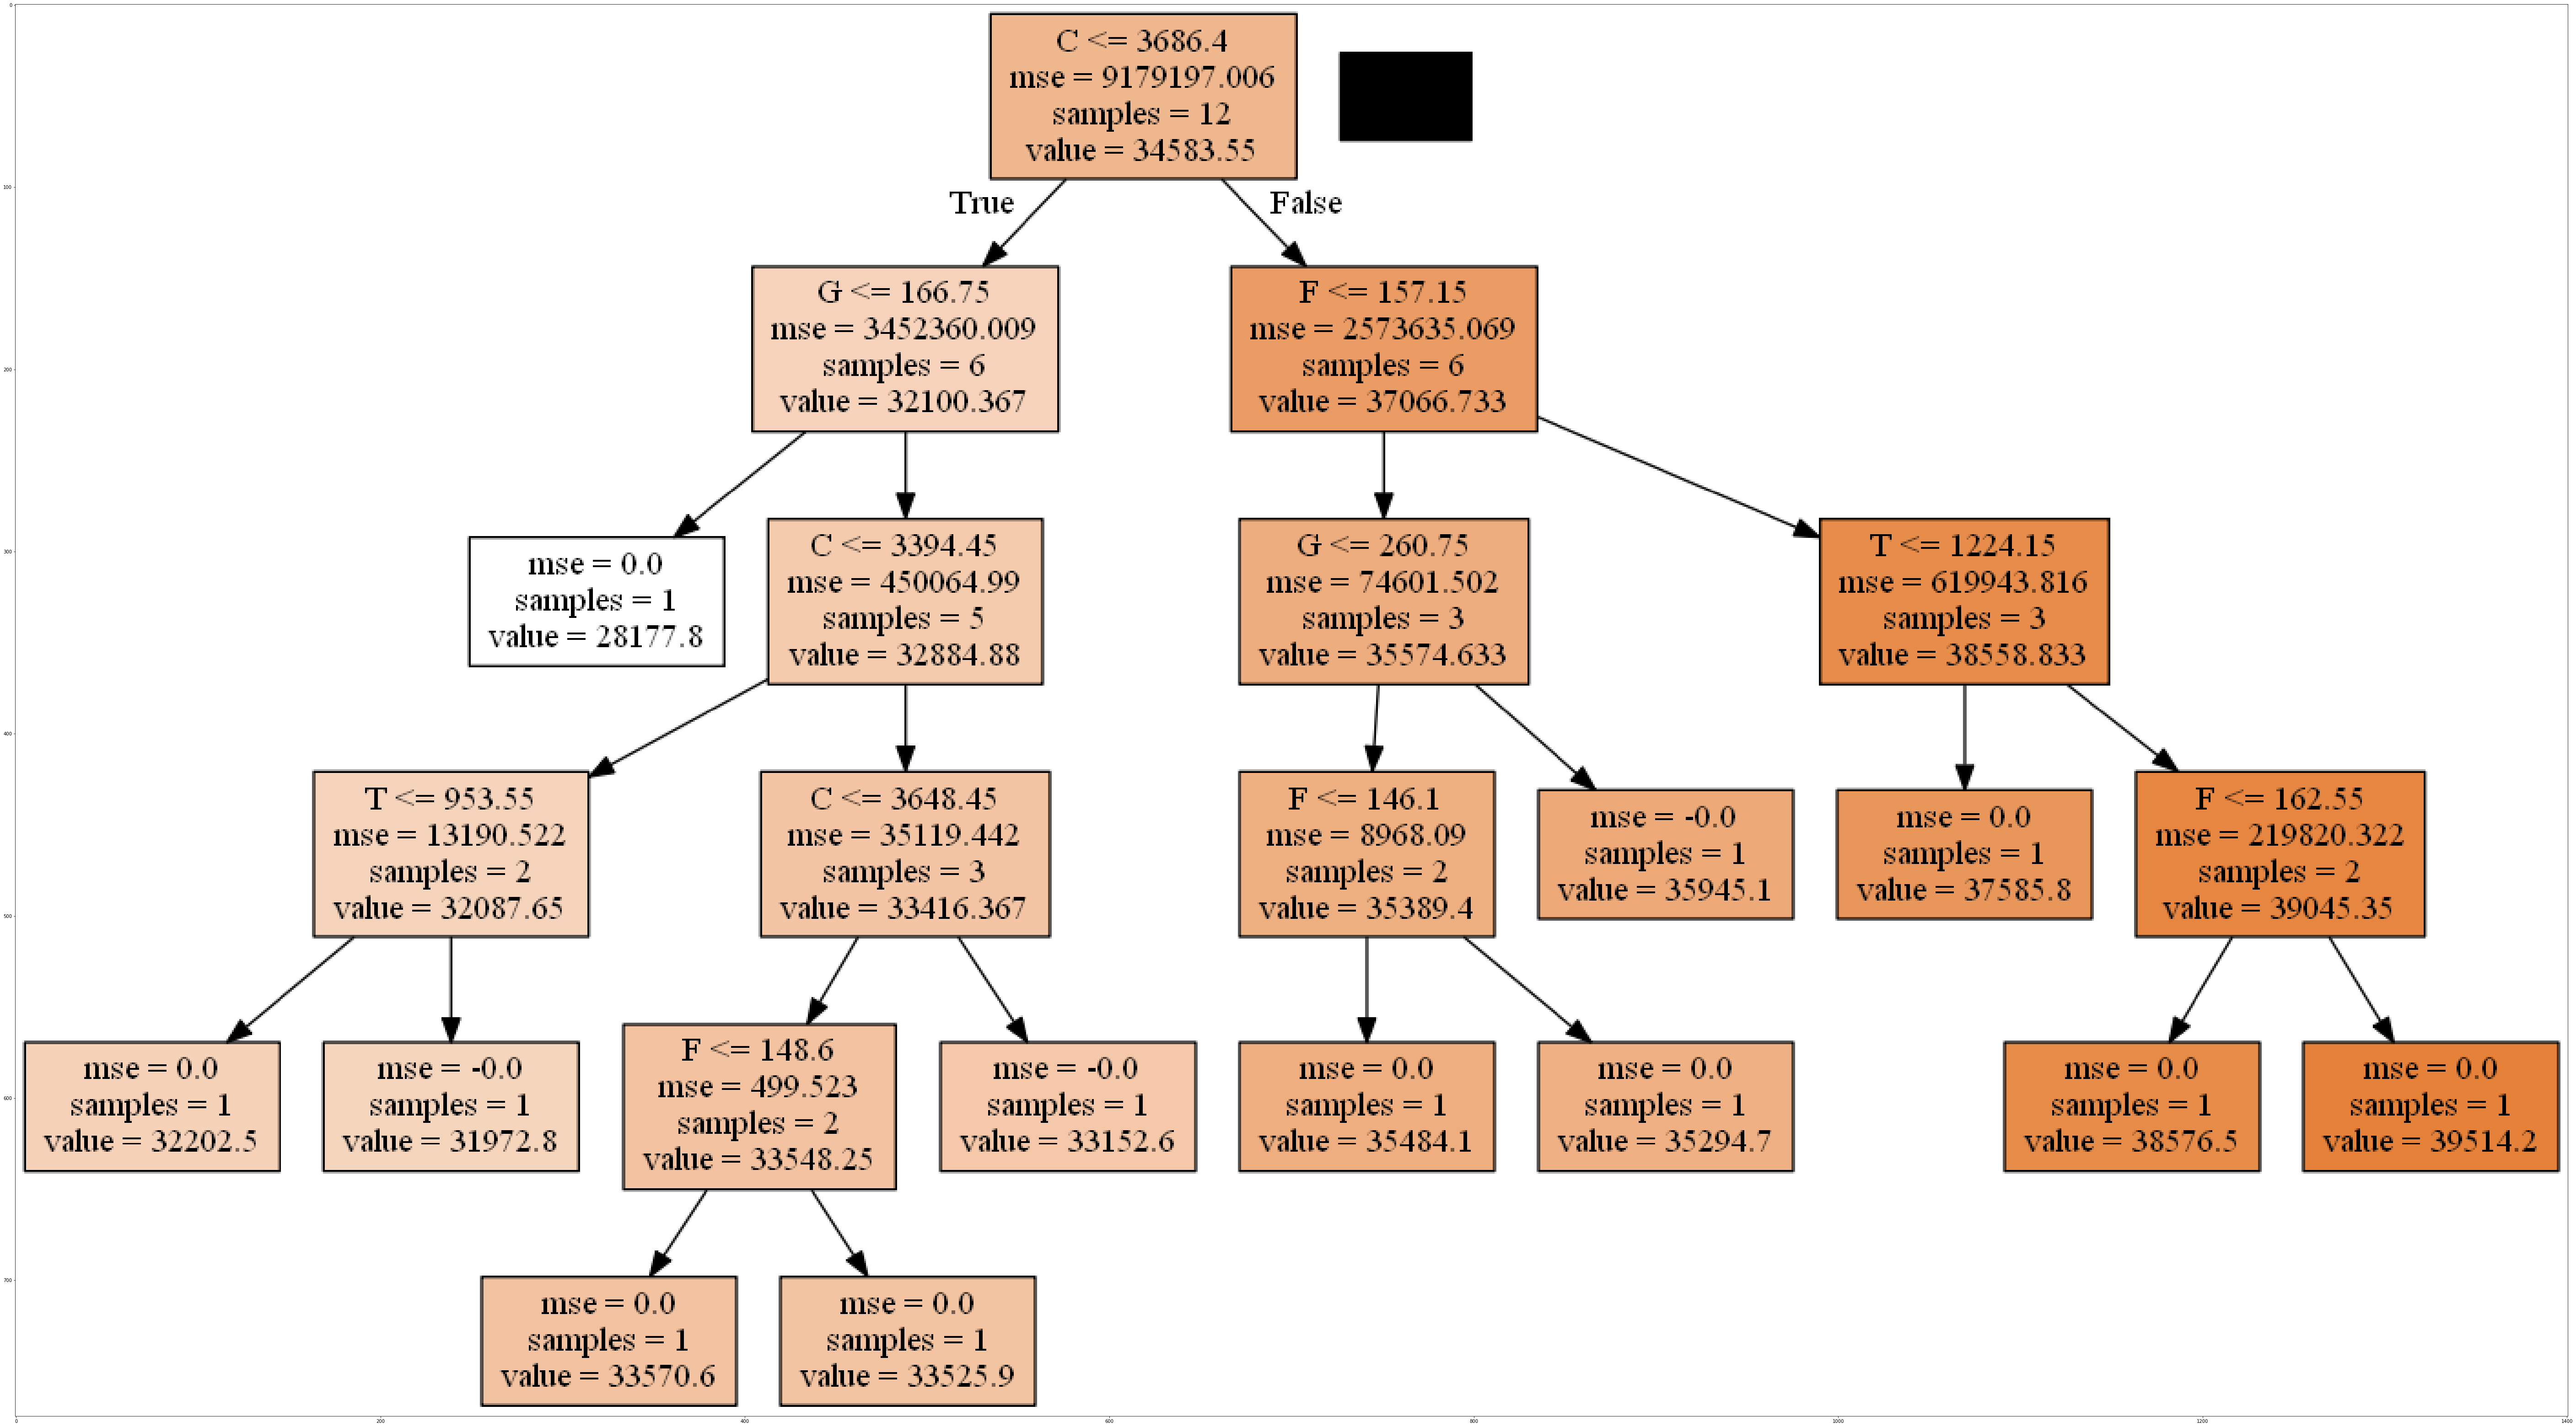

In [26]:
dot_data = io.StringIO()
names=['T','G','C','F']
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'R')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

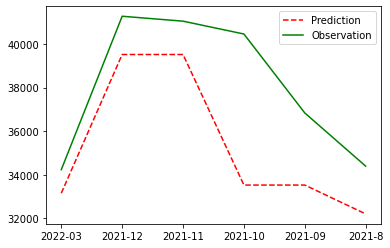

In [27]:
Prediction.values.flatten()
Date=['2022-03', '2021-12','2021-11',
       '2021-10', '2021-09',
       '2021-8']
YObserv=array[:6,4]

plt.plot(Date,Prediction.values.flatten(),'r--',label="Prediction")
plt.plot(Date,YObserv,'g',label="Observation")
plt.legend()

In [28]:
model.score(X_test,Y_test)

0.46455687127005096

In [29]:
model.score(X_train,Y_train)

1.0

In [30]:
model.score(X_new,Ypre)

1.0

In [31]:
model.criterion

'mse'

In [32]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(YObserv,Ypre))
print('Mean Squared Error:', metrics.mean_squared_error(YObserv,Ypre))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(YObserv,Ypre)))

Mean Absolute Error: 2798.6166666666672
Mean Squared Error: 11720834.25166667
Root Mean Squared Error: 3423.5703953134466
